In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
file = 'consumption'
area = 'DK1'

fileName = file + '_'+area
filePrognosisName = file + '_prognosis_'+area

data = pd.read_csv("../../../data/data_sanitized/"+fileName+".csv")
data_prognosis = pd.read_csv("../../../data/data_sanitized/"+filePrognosisName+".csv")

#config
save_plots = True

dates = data['date']
data['date']= pd.to_datetime(data['date'],format='%Y-%m-%d')
data = data.drop(columns=['holiday','date'])
data_prognosis['date']= pd.to_datetime(data_prognosis['date'],format='%Y-%m-%d')
data_prognosis = data_prognosis.drop(columns=['holiday','date'])

str_week_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
str_month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
ylabel = 'Root Mean Square Error [MWh]'

title = {}
title['rmse_day_in_year'] = 'RMSE for each day'
title['sma_rmse_day_in_year'] = 'SMA RMSE for 7 days window'
title['rmse_month_in_year'] = 'Root Mean Square Error for each month'
title['rmse_hour_in_year'] = 'Root Mean Square Error for each hour'
title['rmse_year'] = 'Root Mean Square Error for each year'

data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1818.0,1741.0,1660.0,1593.0,1545.0,1552.0,1605.0,1663.0,1733.0,1809.0,...,2043.0,2088.0,2312.0,2433.0,2481.0,2335.0,2149.0,2000.0,1858.0,1713.0
1,1615.0,1510.0,1461.0,1463.0,1476.0,1579.0,1683.0,1883.0,2026.0,2157.0,...,2295.0,2266.0,2464.0,2703.0,2651.0,2435.0,2264.0,2092.0,2027.0,1822.0
2,1724.0,1665.0,1671.0,1619.0,1642.0,1669.0,1810.0,1986.0,2177.0,2195.0,...,2323.0,2373.0,2603.0,2896.0,2803.0,2621.0,2450.0,2294.0,2127.0,1998.0
3,1844.0,1803.0,1789.0,1819.0,1903.0,2056.0,2434.0,2966.0,3100.0,3059.0,...,2876.0,2864.0,2977.0,3198.0,3047.0,2919.0,2698.0,2463.0,2293.0,2079.0
4,1940.0,1891.0,1952.0,1957.0,2031.0,2162.0,2559.0,3020.0,3143.0,3052.0,...,2939.0,2864.0,3036.0,3300.0,3145.0,2928.0,2729.0,2562.0,2372.0,2193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,1839.0,1795.0,1765.0,1754.0,1779.0,1780.0,1861.0,2078.0,2215.0,2308.0,...,2259.0,2223.0,2204.0,2318.0,2340.0,2185.0,2055.0,2006.0,1957.0,1843.0
1590,1752.0,1691.0,1665.0,1654.0,1662.0,1672.0,1735.0,1890.0,2086.0,2198.0,...,2088.0,2040.0,2080.0,2249.0,2246.0,2131.0,2033.0,1990.0,1928.0,1793.0
1591,1721.0,1658.0,1635.0,1617.0,1620.0,1615.0,1691.0,1818.0,1975.0,2095.0,...,2172.0,2159.0,2154.0,2408.0,2444.0,2304.0,2193.0,2163.0,2108.0,2009.0
1592,1893.0,1827.0,1818.0,1872.0,1888.0,2027.0,2293.0,2580.0,2796.0,2820.0,...,2802.0,2669.0,2667.0,2837.0,2769.0,2597.0,2477.0,2343.0,2264.0,2117.0


In [5]:
data_prognosis

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1811.0,1765.0,1669.0,1597.0,1553.0,1560.0,1644.0,1694.0,1698.0,1801.0,...,2049.0,2095.0,2299.0,2479.0,2442.0,2329.0,2180.0,2026.0,1863.0,1753.0
1,1643.0,1556.0,1495.0,1486.0,1509.0,1589.0,1716.0,1894.0,2063.0,2164.0,...,2234.0,2283.0,2472.0,2712.0,2644.0,2416.0,2259.0,2099.0,1989.0,1855.0
2,1723.0,1667.0,1647.0,1627.0,1636.0,1669.0,1783.0,1961.0,2158.0,2251.0,...,2316.0,2351.0,2599.0,2902.0,2797.0,2618.0,2405.0,2269.0,2126.0,2000.0
3,1860.0,1777.0,1785.0,1803.0,1878.0,2065.0,2480.0,2963.0,3186.0,3188.0,...,2948.0,2854.0,2982.0,3207.0,3037.0,2889.0,2706.0,2497.0,2272.0,2072.0
4,1941.0,1881.0,1886.0,1929.0,2034.0,2156.0,2579.0,3053.0,3165.0,3077.0,...,2966.0,2876.0,3012.0,3289.0,3126.0,2943.0,2723.0,2551.0,2353.0,2146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,1845.0,1750.0,1728.0,1692.0,1722.0,1784.0,1858.0,2043.0,2227.0,2292.0,...,2254.0,2210.0,2208.0,2326.0,2306.0,2194.0,2078.0,2044.0,1936.0,1837.0
1590,1739.0,1672.0,1644.0,1654.0,1664.0,1681.0,1747.0,1899.0,2083.0,2196.0,...,2102.0,2060.0,2078.0,2210.0,2250.0,2117.0,2034.0,1997.0,1924.0,1819.0
1591,1702.0,1645.0,1627.0,1624.0,1628.0,1617.0,1676.0,1827.0,1987.0,2091.0,...,2141.0,2147.0,2165.0,2359.0,2427.0,2292.0,2204.0,2159.0,2112.0,2015.0
1592,1932.0,1826.0,1825.0,1867.0,1895.0,2038.0,2351.0,2623.0,2774.0,2861.0,...,2796.0,2672.0,2631.0,2765.0,2739.0,2600.0,2470.0,2396.0,2277.0,2143.0


In [4]:
#Plots
def draw_plot_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
    
def draw_plot_monthofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Month')
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(1,13))
    ax.set_xticklabels(str_month_list)
    
def draw_plot_hourofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Hour')
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(0,24))
    
def draw_simple_barplot_for_years(data_frame, name='Plot', ylabel = ylabel):
    fig, ax = plt.subplots()
    min_val = min(data_frame.iloc[:,0])
    max_val = max(data_frame.iloc[:,0])
    margin = (max_val - min_val)*3/10
    plt.ylim([min_val - margin,max_val + margin])
    ax.bar(data_frame.index,data_frame.iloc[:,0])
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(name)
    ax.set_xticks(data_frame.index)

In [5]:
def savePlot(name):
    if(save_plots):
        fileName = '../plots/'+ name + '_' + area
        plt.savefig(fileName, bbox_inches='tight')

In [6]:
mse = ((data - data_prognosis)**2)
mse['date'] = dates
mse['date']= pd.to_datetime(mse['date'],format='%Y-%m-%d')
mse['year'] = mse['date'].dt.year
mse

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,date,year
0,49.0,576.0,81.0,16.0,64.0,64.0,1521.0,961.0,1225.0,64.0,...,169.0,2116.0,1521.0,36.0,961.0,676.0,25.0,1600.0,2016-01-01,2016
1,784.0,2116.0,1156.0,529.0,1089.0,100.0,1089.0,121.0,1369.0,49.0,...,64.0,81.0,49.0,361.0,25.0,49.0,1444.0,1089.0,2016-01-02,2016
2,1.0,4.0,576.0,64.0,36.0,0.0,729.0,625.0,361.0,3136.0,...,16.0,36.0,36.0,9.0,2025.0,625.0,1.0,4.0,2016-01-03,2016
3,256.0,676.0,16.0,256.0,625.0,81.0,2116.0,9.0,7396.0,16641.0,...,25.0,81.0,100.0,900.0,64.0,1156.0,441.0,49.0,2016-01-04,2016
4,1.0,100.0,4356.0,784.0,9.0,36.0,400.0,1089.0,484.0,625.0,...,576.0,121.0,361.0,225.0,36.0,121.0,361.0,2209.0,2016-01-05,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,36.0,2025.0,1369.0,3844.0,3249.0,16.0,9.0,1225.0,144.0,256.0,...,16.0,64.0,1156.0,81.0,529.0,1444.0,441.0,36.0,2020-05-08,2020
1590,169.0,361.0,441.0,0.0,4.0,81.0,144.0,81.0,9.0,4.0,...,4.0,1521.0,16.0,196.0,1.0,49.0,16.0,676.0,2020-05-09,2020
1591,361.0,169.0,64.0,49.0,64.0,4.0,225.0,81.0,144.0,16.0,...,121.0,2401.0,289.0,144.0,121.0,16.0,16.0,36.0,2020-05-10,2020
1592,1521.0,1.0,49.0,25.0,49.0,121.0,3364.0,1849.0,484.0,1681.0,...,1296.0,5184.0,900.0,9.0,49.0,2809.0,169.0,676.0,2020-05-11,2020


In [11]:
metrics.mean_absolute_error(data.loc[866:,'0':'23'],data_prognosis.loc[866:,'0':'23'])

22.685725732600734

In [7]:
rmse_on_days = mse.copy()
df = rmse_on_days
df['dayofyear'] = df['date'].dt.dayofyear
df = df.drop(columns=['date'])
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour",0:'mse'})
df = df.groupby(['year','dayofyear']).sum()
df['mse'] = np.sqrt(df['mse'] / 24)
rmse_on_days = df
rmse_on_days

mse
year dayofyear            
2016 1           61.541653
     2           57.656671
     3           85.942083
     4           81.099476
     5          115.949702
...                    ...
2020 129         50.445102
     130         29.765052
     131         97.834256
     132        109.762433
     133        190.182040

[1594 rows x 1 columns]

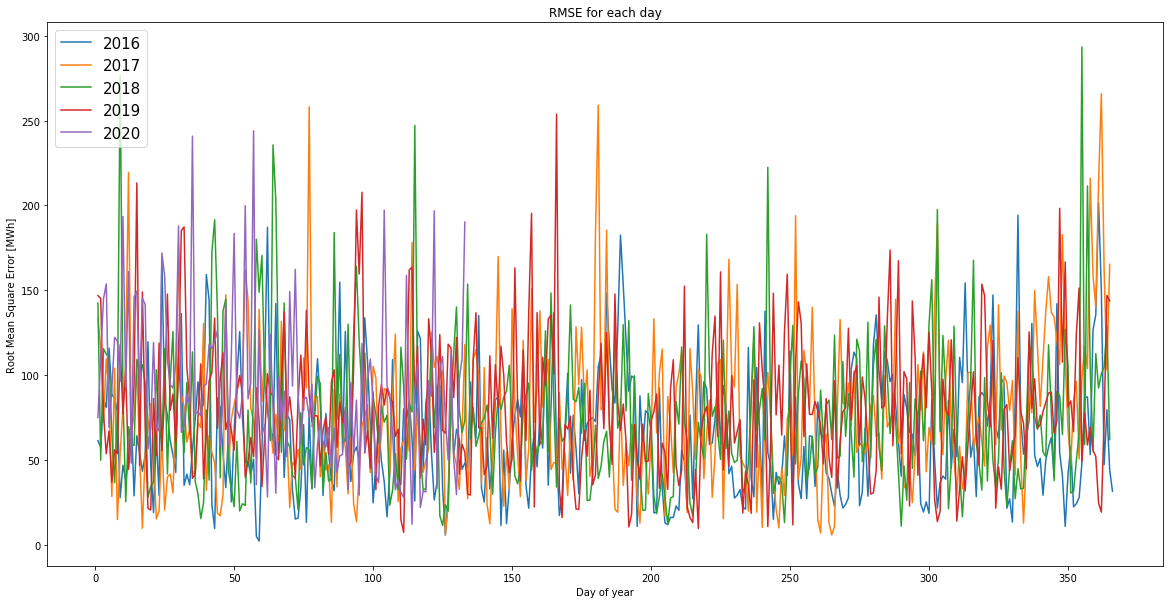

In [8]:
draw_plot_dayofyear(rmse_on_days, title['rmse_day_in_year'],ylabel)
savePlot('rmse_day')

In [9]:
sma_rmse_on_days = mse.copy()
df = sma_rmse_on_days
df['dayofyear'] = df['date'].dt.dayofyear
df = df.drop(columns=['date'])
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour",0:'mse'})
df = df.groupby(['year','dayofyear']).sum()
df['mse'] = np.sqrt((df['mse'] / 24))
df['sma'] = df.rolling(7,min_periods=1).mean()
df = df.drop(columns=['mse'])
sma_rmse_on_days = df
sma_rmse_on_days

sma
year dayofyear           
2016 1          61.541653
     2          59.599162
     3          68.380135
     4          71.559971
     5          80.437917
...                   ...
2020 129        76.647405
     130        76.122110
     131        75.223786
     132        75.048626
     133        91.550849

[1594 rows x 1 columns]

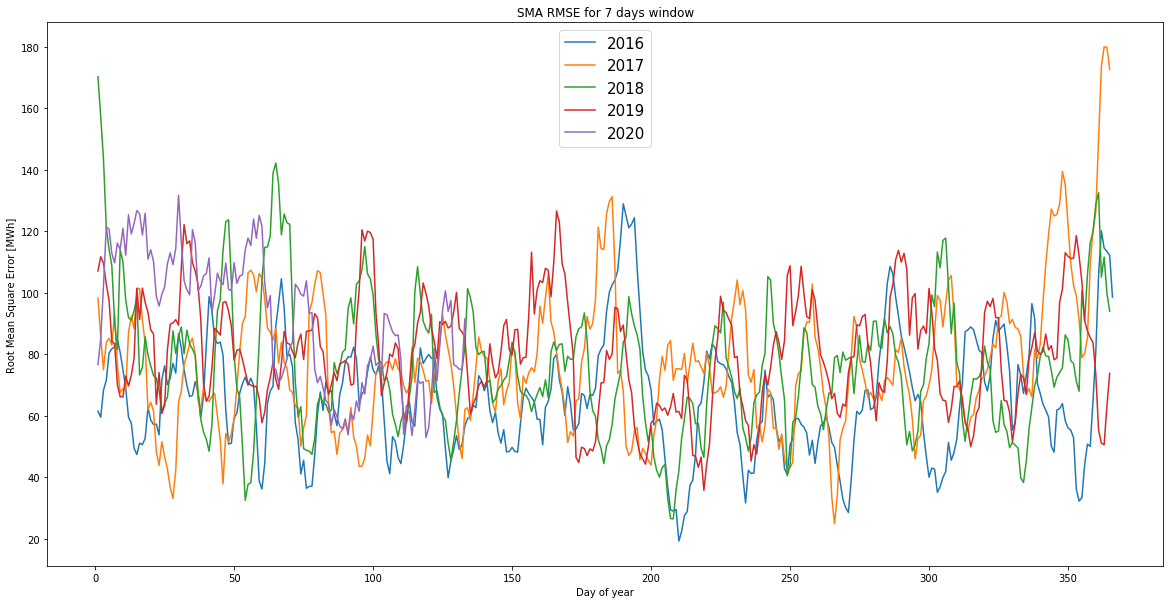

In [10]:
draw_plot_dayofyear(sma_rmse_on_days, title['sma_rmse_day_in_year'],ylabel)
savePlot('sma_rmse_7days')

In [11]:
rmse_on_months = mse.copy()
df = rmse_on_months
df['month'] = df['date'].dt.month
df = df.drop(columns=['date'])
df = df.set_index(['year','month']).stack().reset_index().rename(columns={"level_2": "hour",0:'rmse'})
df = df.drop(columns=['hour'])
df = df.groupby(['year','month']).agg(['sum','count'])
df = df['rmse']
df['rmse'] = np.sqrt((df['sum'] / df['count']))
df = df.drop(columns=['count','sum'])
rmse_on_months = df
rmse_on_months

rmse
year month            
2016 1       77.510232
     2       72.696217
     3       82.561561
     4       72.038310
     5       62.970498
     6       75.025366
     7       83.761542
     8       71.315962
     9       60.095965
     10      72.655620
     11      86.146605
     12      81.069141
2017 1       86.862431
     2       84.738244
     3       84.881036
     4       73.651441
     5       84.566351
     6       99.625493
     7       77.748310
     8       84.327423
     9       78.948181
     10      81.469831
     11      82.838171
     12     133.834148
2018 1       97.860637
     2       93.869178
     3       97.845365
     4       93.829899
     5       80.780051
     6       77.338389
     7       70.215251
     8       85.147682
     9       72.580453
     10      92.989299
     11      70.413412
     12     105.101909
2019 1       99.125057
     2       87.306069
     3       82.492245
     4      100.889943
     5       88.506659
     6       97.465350
     7       76.786273
     8       74.489644
     9       92.904782
     10      94.210471
     11      80.781169
     12      96.639969
2020 1      120.329107
     2      118.837067
     3       79.723093
     4       83.868581
     5      109.933392

In [12]:
def draw_plot_monthofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Month')
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(1,13))
    ax.set_xticklabels(str_month_list)

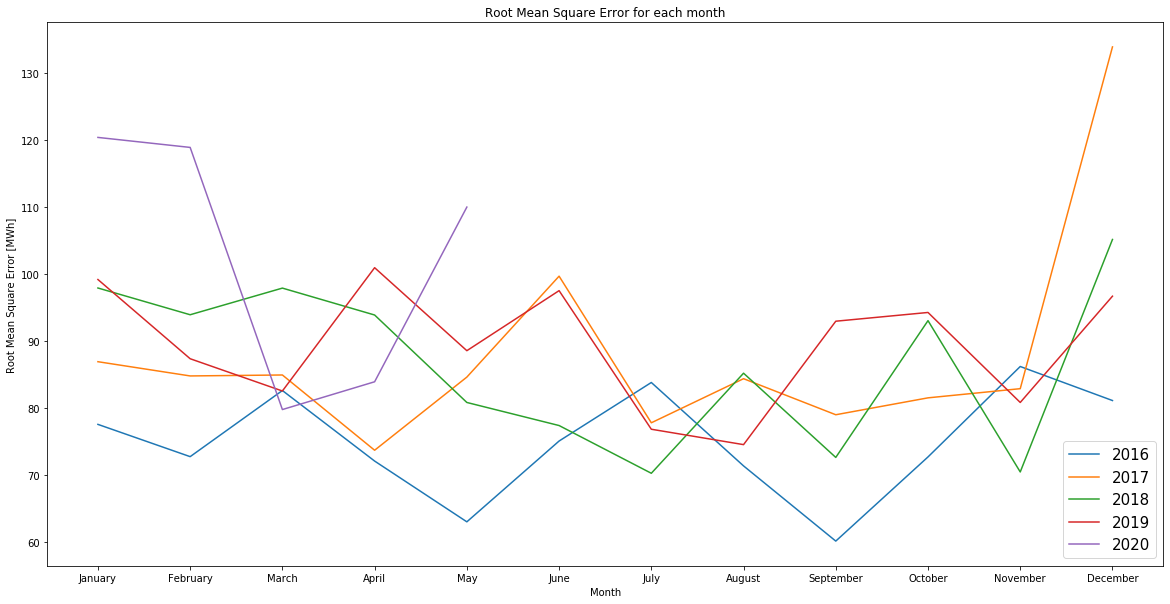

In [13]:
draw_plot_monthofyear(rmse_on_months, title['rmse_month_in_year'], ylabel)
savePlot('rms_month')

In [14]:
rmse_on_hours = mse.copy()
df = rmse_on_hours
df = df.drop(columns=['date'])
df = df.set_index(['year']).stack().reset_index().rename(columns={"level_1": "hour",0:'mse'})
df = df.groupby(['year','hour']).agg(['sum','count'])
df = df['mse']
df['rmse'] = np.sqrt((df['sum'] / df['count']))
df = df.drop(columns=['sum','count'])
df.index = df.index.set_levels(df.index.levels[1].astype(int),level=1)
df = df.sort_index()
rmse_on_hours = df
rmse_on_hours.index.levels[:-1]
rmse_on_hours.index.levels[0]
rmse_on_hours

rmse
year hour            
2016 0      66.849701
     1      63.696085
     2      65.513946
     3      66.506317
     4      69.357709
...               ...
2020 19    107.275242
     20    112.207079
     21    120.241424
     22    119.190471
     23    127.867736

[120 rows x 1 columns]

In [15]:
def draw_plot_hourofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Hour')
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(0,24))

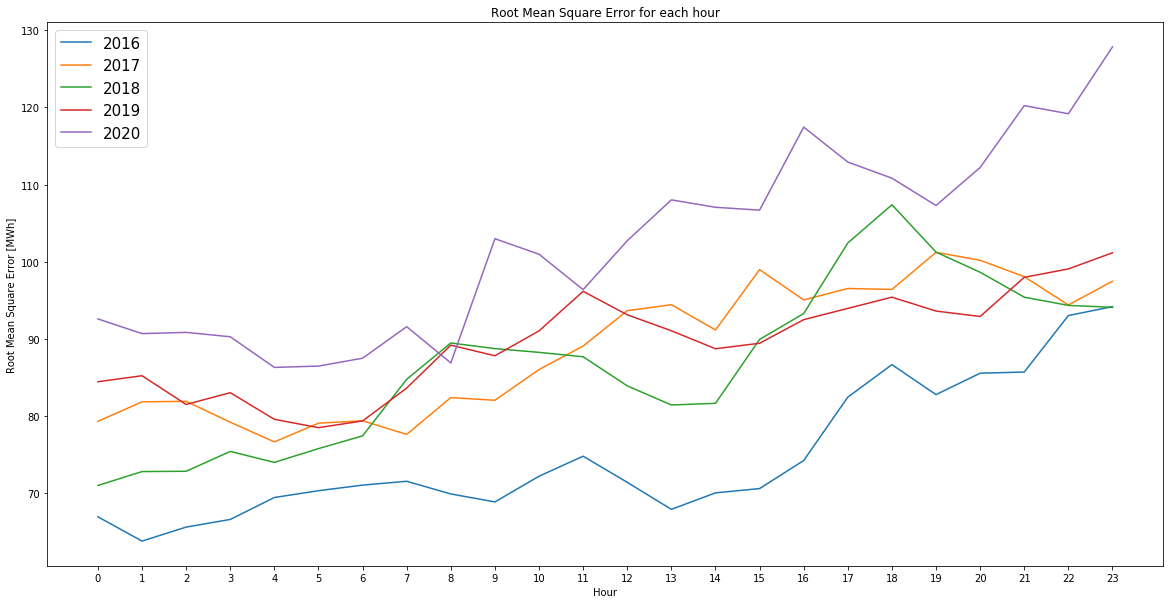

In [16]:
draw_plot_hourofyear(rmse_on_hours, title['rmse_hour_in_year'])
savePlot('rmse_hour')

In [17]:
rmse_for_year = mse.copy()
df = rmse_for_year
df = df.drop(columns=['date'])
df = df.set_index(['year']).stack().reset_index().rename(columns={"level_2": "hour",0:'mse'})
df = df.groupby(['year']).agg(['sum','count'])
df = df['mse']
df['rmse'] = np.sqrt((df['sum'] / df['count']))
df = df.drop(columns=['sum','count'])
rmse_for_year = df
rmse_for_year

,rmse
year,
2016,75.237488
2017,89.169527
2018,87.289376
2019,89.692353
2020,103.017205


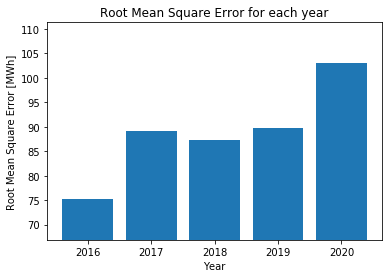

In [18]:
draw_simple_barplot_for_years(rmse_for_year,title['rmse_year'])
savePlot('rmse_year')